<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-EvelynAylin/blob/main/Actividad_Semanal_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Actividad Semanal -- 6

Materia: Ciencia y Analítica de datos

Alumno: Evelyn Aylin Rendon Medina

Matricula: A01748750

Fecha de entrega: 25 de octubre 2022

# Conjunto de datos

**Nombre del conjunto de datos:** The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients

**Descripción del conjunto de datos:**

- X1: Monto del crédito otorgado (NT dollar): incluye tanto el crédito al consumo individual como su crédito familiar (complementario)
- X2: Género (1 = masculino; 2 = femenino)
- X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = secundaria; 4 = otros)
- X4: Estado civil (1 = casado; 2 = soltero; 3 = otros)
- X5: Edad (años)
- X6 - X11: Historial de pagos pasados. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más 
- X12-X17: Importe del estado de cuenta, lo que debe pagar (NT dollar)
- X18-X23: Monto del pago anterior (NT dollar)
- Y: Probabilidad real de incumplimiento como variable de salida
- ID: Identificador establecido

Donde para cada variable los meses correspondientes son:

-	X6: abril 

-	X7: mayo

-	X8: junio

-	X9: julio

-	X10: agosto

-	X11: septiembre 

--------------------------
-	X12: abril 

-	X13: mayo

-	X14: junio

-	X15: julio

-	X16: agosto

-	X17: septiembre 

--------------------------
-	X18: abril 

-	X19: mayo

-	X20: junio

-	X21: julio

-	X22: agosto

-	X23: septiembre


**Conjunto de datos generado por:** 
- Cheng Yeh
- Che-hui Lienb

**Información general:** 

Investigación de los pagos realizados por clientes en Taiwán, donde se compara la presición predictiva de la probabilidad de incumplimiento (en el pago). La salida es el resultado binario de la clasificación: clientes creíbles o no creíbles. Debido a que se desconoce la probabilidad real de incumplimiento, el estudio presentó el “Método de suavizado de clasificación” para estimar la probabilidad real de incumplimiento, 'Y', que es el resultado de la regresión lineal simple (Y = A + BX).

## Librerías

In [190]:
import pandas as pd
import numpy as np
from statistics import mode
from sklearn import preprocessing 
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

## 1 Carga de datos

In [191]:
path='https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
df_original=pd.read_csv(path)
df=df_original.copy() #Creamos una copia del dataframe que contiene los datos originales
df.head(2) #Observamos las dos primeras filas

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0


## 2 Obteniendo información del DataFrame

Obtenemos sus dimensiones

In [192]:
dimensiones=df.shape
filas=dimensiones[0]
columnas=dimensiones[1]    
print('Las dimensiones del DataFrame son:', dimensiones,
    '\ndonde el número de columnas es:', columnas, '\ny la cantidad de filas sería:', filas)

Las dimensiones del DataFrame son: (30000, 25) 
donde el número de columnas es: 25 
y la cantidad de filas sería: 30000


Analizamos los nombres de las columnas, recordando que:
- X1: Monto del crédito otorgado (NT dollar): incluye tanto el crédito al consumo individual como su crédito familiar (complementario)
- X2: Género (1 = masculino; 2 = femenino)
- X3: Educación (1 = escuela de posgrado; 2 = universidad; 3 = secundaria; 4 = otros)
- X4: Estado civil (1 = casado; 2 = soltero; 3 = otros)
- X5: Edad (años)
- X6 - X11: Historial de pagos pasados. La escala de medición del estado de amortización es: -1 = pagar debidamente; 1 = retraso en el pago de un mes; 2 = retraso en el pago de dos meses; . . .; 8 = retraso en el pago de ocho meses; 9 = retraso en el pago de nueve meses o más 
- X12-X17: Importe del estado de cuenta, lo que debe pagar (NT dollar)
- X18-X23: Monto del pago anterior (NT dollar)

Donde para cada variable los meses correspondientes son:

-	X6: abril 

-	X7: mayo

-	X8: junio

-	X9: julio

-	X10: agosto

-	X11: septiembre 

--------------------------
-	X12: abril 

-	X13: mayo

-	X14: junio

-	X15: julio

-	X16: agosto

-	X17: septiembre 

--------------------------
-	X18: abril 

-	X19: mayo

-	X20: junio

-	X21: julio

-	X22: agosto

-	X23: septiembre



In [193]:
nombresColumnas=df.columns
print(nombresColumnas)

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')


Imprimimos las 12 primeras filas del DataFrame

In [194]:
df.head(10)
#Observamos, por ejemplo, que para la fila de índice 9, columna 'X6' se tiene un valor que no corresponde
#con las opciones disponibles (-2), por lo que tendremos que arreglar posteriomente dichos datos inválidos

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0
5,6,50000,1.0,1.0,2.0,37.0,0.0,0.0,0.0,0.0,...,19394.0,19619.0,20024.0,2500.0,1815.0,657.0,1000.0,1000.0,800.0,0.0
6,7,500000,1.0,1.0,2.0,29.0,0.0,0.0,0.0,0.0,...,542653.0,483003.0,473944.0,55000.0,40000.0,38000.0,20239.0,13750.0,13770.0,0.0
7,8,100000,2.0,2.0,2.0,23.0,0.0,-1.0,-1.0,0.0,...,221.0,-159.0,567.0,380.0,601.0,0.0,581.0,1687.0,1542.0,0.0
8,9,140000,2.0,3.0,1.0,28.0,0.0,0.0,2.0,0.0,...,12211.0,11793.0,3719.0,3329.0,0.0,432.0,1000.0,1000.0,1000.0,0.0
9,10,20000,1.0,3.0,2.0,35.0,-2.0,-2.0,-2.0,-2.0,...,0.0,13007.0,13912.0,0.0,0.0,0.0,13007.0,1122.0,0.0,0.0


Observamos el tipo de datos que contiene el DataFrame

In [195]:
tiposDatos=df.dtypes
print(tiposDatos) #Notamos que no hay ninguna variable tipo 'object'

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object


Utilizamos el método .info() para imprimir información sobre el DataFrame, que incluye el tipo de índice y las columnas, los valores no nulos y el uso de la memoria.

In [196]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

Verificamos cuántos valores faltantes hay en las columnas

In [197]:
df.isna().sum()

ID      0
X1      0
X2      1
X3      2
X4      2
X5      5
X6      3
X7      5
X8      7
X9      9
X10    16
X11    14
X12    11
X13    11
X14    13
X15    15
X16    17
X17    10
X18     8
X19     9
X20     8
X21    11
X22    11
X23     5
Y       3
dtype: int64

In [198]:
df.isna().sum().sum()

196

## 3 Limpieza de datos



### Estandarización

In [320]:
#Se comprueba que X1 tenga valores numéricos <=0 debido a que es el monto de crédito otorgado y no podría ser negativo. 
#En caso que existieran esos valores, se considerarán iguales a cero.
df[df['X1']<=0]=0 
#Se comprueba si hay elementos en X2 cuyos valores no correspondan a las categorías de género disponibles. 
#En caso que existieran esos valores, se sustituirán por el elemento más frecuente (moda)
df[(df['X2']!=1) & (df['X2']!=2)]=mode(df['X2'])
#Se comprueba si hay elementos en X3 cuyos valores no correspondan a las categorías de educación disponibles. 
#En caso que existieran esos valores, se les asignará la categoría 'otra' porque es una no específica 
#y al no contar con el dato correcto, sería la opción más lógica.
df[(df['X3']!=1) & (df['X3']!=2) & (df['X3']!=3) & (df['X3']!=4)]=4 
#Se comprueba si hay elementos en X4 cuyos valores no correspondan a las categorías de estado civil disponibles. 
#En caso que existieran esos valores, se les asignará la categoría 'otra' porque es una no específica 
#y al no contar con el dato correcto, sería la opción más lógica.
df[(df['X4']!=1) & (df['X4']!=2) & (df['X4']!=3)]=3 
#Se comprueba si hay elementos en X5 cuyos valores no correspondan con una edad lógica (<18 = ilógico). 
#En caso que existieran esos valores, se les asignará la edad más frecuente
df[df['X5']<18]=mode(df['X5'])
#Se comprueba si hay elementos en X6:X11 (sep-abr 2005) cuyos valores no correspondan con un historial de pago lógico (<-1). 
#En caso que existieran esos valores, se les asignará la categoría 'paga debidamente' (-1), puesto que 
#si son números negativos más grandes que -1, podría significar un error al capturar los datos.
r6=df.columns.get_loc('X6') #Se busca el índice para la columna llamada 'X6'
r11=df.columns.get_loc('X11') #Se busca el índice para la columna llamada 'X11
for i in range(r6,r11+1): #Se modifican los valores del índice de la columna 6 a la 11, (11+1 porque es excluyente)
  df[df.iloc[:,i]<-1] =-1 #cdf[cdf['X6']<-1] =-1
#Se comprueba si hay elementos en X11:X17 cuyos valores no correspondan con un monto de deuda lógico (<-1 = ilógico).
#En caso que existieran esos valores, se transformarán a positivos, considerando que se deban a un error de captura.
r12=df.columns.get_loc('X12') 
r17=df.columns.get_loc('X17')
for i in range(r12,r17+1): 
  df[df.iloc[:,i]<=-1]=df[df.iloc[:,i]<=-1]*-1
#Se comprueba si hay elementos en X18:X23 cuyos valores no correspondan con un monto de pago anterior lógico (<-1 = ilógico).
#En caso que existieran esos valores, se transformarán a positivos, considerando que se deban a un error de captura.
r18=df.columns.get_loc('X18') 
r23=df.columns.get_loc('X23') 
for i in range(r18,r23+1): 
  df[df.iloc[:,i]<=-1]=df[df.iloc[:,i]<=-1]*-1

### Tratamiento de datos faltantes

In [240]:
print('El total de datos faltantes es de:',df.isnull().sum().sum())
print('que representan el',str(round(df.isnull().sum().sum()/df.shape[0]*100,2)), '% de los',df.shape[0],'registros')

El total de datos faltantes es de: 0
que representan el 0.0 % de los 29994 registros


In [241]:
#Eliminamos las filas donde falten todos los elementos
df.dropna(how='all', inplace = True)
#Eliminamos las filas donde haya a partir de 10 elementos faltantes
for i in range(10,14):
  df.dropna(thresh=i, inplace = True)
#Se imputan los valores faltantes en X5 con la edad más frecuente.
modaX5=mode(df['X5']) ##modaX5=cdf.X5.mode() 
df['X5'].fillna(modaX5, inplace=True)
#Los valores NaN de X6:X11, son sustituidos por el valor más común de esa columna (moda).
for i in range(r6,r11+1): 
  df.iloc[:,i].fillna(mode(df.iloc[:,i]), inplace=True) #modaX6=mode(cdf['X6']) 
#Los datos faltantes en X12:X23 se obtienen a través de la imputación media.
for i in range(r12,r23+1): 
  df.iloc[:,i].fillna(mode(df.iloc[:,i]), inplace=True)
#Debido a que Y representa la probabilidad real de incumplimiento como variable de respuesta,
#lo considero un dato clave y donde haya elementos NaN contemplo más viable eliminarlos que imputarlos.
df.dropna(subset=['Y'], axis=0, inplace=True)
#Comprobación
print(df.isnull().sum())
print('Datos faltantes:',df.isnull().sum().sum())

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64
Datos faltantes: 0


## 4 Cálculo de estadística descriptiva

In [322]:
df.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000,...,29994.000000,29994.000000,29994.000000,29994.000000,2.999400e+04,29994.000000,29994.000000,29994.000000,29994.000000,29994.000000
mean,11506.487131,120541.688204,1.685004,1.885877,1.663999,27.639661,0.596486,0.603054,0.591618,0.560112,...,41106.349803,38421.058078,36984.397780,4684.474728,4.721985e+03,4291.683003,3926.799393,3895.546376,4117.294092,0.635927
std,9820.135358,129841.463047,0.464522,0.617820,0.490900,16.168372,1.154103,1.184818,1.179752,1.169896,...,63848.378283,60273.280348,58988.893748,15062.127343,1.801936e+04,16099.720357,13821.191639,13301.300881,15362.526729,0.829963
min,2.000000,2.000000,1.000000,1.000000,1.000000,2.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,-1.000000,0.000000,0.000000
25%,850.250000,20000.000000,1.000000,1.000000,1.000000,23.000000,0.000000,0.000000,0.000000,0.000000,...,316.000000,316.000000,2.000000,2.000000,2.000000e+00,2.000000,2.000000,2.000000,2.000000,0.000000
50%,10517.500000,80000.000000,2.000000,2.000000,2.000000,30.000000,0.000000,0.000000,0.000000,0.000000,...,17428.000000,16331.000000,14804.500000,1830.500000,1.759500e+03,1400.000000,1011.000000,1016.000000,1000.000000,0.000000
75%,20057.750000,200000.000000,2.000000,2.000000,2.000000,39.000000,2.000000,2.000000,2.000000,2.000000,...,51032.000000,48649.750000,47605.250000,4441.500000,4.188000e+03,3758.250000,3402.750000,3358.750000,3300.000000,1.000000
max,30000.000000,1000000.000000,2.000000,4.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.227082e+06,896040.000000,621000.000000,426529.000000,528666.000000,2.000000


Las medidas de tendencia central más utilizadas son: media, mediana y moda.

Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión

Podemos observar como medida de tendencia central a la media o promedio, que está dado como 'mean' en nuestras estadísticas. Se genera para cada uno de los valores y nos dice que es donde se centra la mayoría de los datos, es decir, oscilan entre ese valor, para cada variable.

Por otro lado, podemos visualizar la dispersión de los datos a través a través del valor mínimo y máximo, entendiendo que ahí se encuentran los límites más lejanos de los datos, por decirlo de alguna forma. Asimismo, se tienen los cuartiles que nos indican los valores en porcentajes acumulativos del 25%.

Finalmente se tiene la desviación estándar para cada una de las variables, que nos indica qué tan dispersos se encuentran los datos.

EL primer valor generado en la tabla nos dice únicamente la cantidad de registros que se tiene para dicha columna.

## 5 Conteo de las variables categóricas

In [246]:
#El conteo de las variables categóricas se realiza con base en la descripción del conjunto de datos
categorical_vars=['X2','X3','X4','X6','X7','X8','X9','X10','X11']
print('Cantidad de variables categóricas:',df[categorical_vars].shape[1] )#Imprimimos la segunda dimensión para que se imprima la cantidad total de columnas
print('Las cuales son:',categorical_vars)

Cantidad de variables categóricas: 9
Las cuales son: ['X2', 'X3', 'X4', 'X6', 'X7', 'X8', 'X9', 'X10', 'X11']


In [247]:
#Creamos una copia del dataframe limpio
dfl=df.copy()
#Eliminamos las variables categóricas para escalar y aplicar PCA
dfl.drop(categorical_vars, axis=1, inplace=True)
#También se elimina la columna de salida Y e ID, puesto que la estimación no aporta
#al modelo y es suficiente con los índices que contiene el DataFrame
dfl.drop(['Y','ID'], axis=1, inplace=True)
print('La salida Y también es una variable categórica, entonces el total es:',df[categorical_vars].shape[1]+1)

La salida Y también es una variable categórica, entonces el total es: 10


## 6 Escalamiento de los datos (normalización)

In [248]:
#Normalización con sklearn.preprocessing.scale 
#Standardize a dataset along any axis.
#Center to the mean and component wise scale to unit variance.
pca=PCA()
pca.fit(preprocessing.scale(dfl)) #Aquí se normaliza y aplica PCA
#Es necesario escalar los datos para aplicar PCA debido a que PCA
#asume que los datos están centrados alrededor del origen

PCA()

## 7 PCA

In [249]:
#PCA se realiza en el último paso de preprocesamiento, en la sección de normalización
#Puesto que ambos procesos (normalización y PCA) se hacen en la misma línea de código
#pca=PCA()
#pca.fit(preprocessing.scale(dfl)) 

#Se observa la correlacion entre las variables del df
correlacion=dfl.corr()
correlacion

,X1,X5,X12,X13,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
X1,1.000000,0.489980,0.502549,0.498212,0.501785,0.506048,0.503701,0.493151,0.275128,0.262866,0.275640,0.271095,0.289982,0.279123
X5,0.489980,1.000000,0.343116,0.343161,0.342981,0.338206,0.333991,0.328342,0.159219,0.137544,0.141490,0.144419,0.149217,0.135621
X12,0.502549,0.343116,1.000000,0.964758,0.926149,0.891763,0.866740,0.842477,0.185051,0.157565,0.196000,0.210580,0.217678,0.225078
X13,0.498212,0.343161,0.964758,1.000000,0.952023,0.915714,0.889088,0.864613,0.305973,0.159214,0.195045,0.202281,0.212947,0.216815
X14,0.501785,0.342981,0.926149,0.952023,1.000000,0.948670,0.915374,0.884384,0.285205,0.297872,0.168059,0.192779,0.211801,0.231577
X15,0.506048,0.338206,0.891763,0.915714,0.948670,1.000000,0.952091,0.918825,0.273892,0.261711,0.313041,0.176920,0.208558,0.223662
X16,0.503701,0.333991,0.866740,0.889088,0.915374,0.952091,1.000000,0.956376,0.258410,0.233172,0.280220,0.309146,0.188167,0.211009
X17,0.493151,0.328342,0.842477,0.864613,0.884384,0.918825,0.956376,1.000000,0.241833,0.210204,0.263993,0.278334,0.327202,0.162380
X18,0.275128,0.159219,0.185051,0.305973,0.285205,0.273892,0.258410,0.241833,1.000000,0.375113,0.288114,0.237425,0.166042,0.179921
X19,0.262866,0.137544,0.157565,0.159214,0.297872,0.261711,0.233172,0.210204,0.375113,1.000000,0.299975,0.227046,0.155749,0.202947


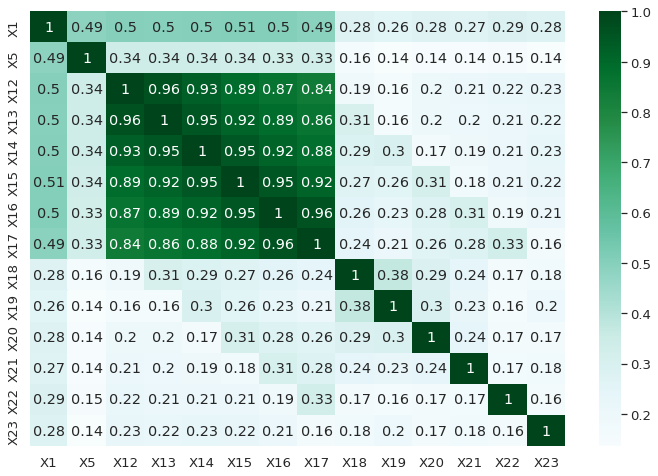

In [250]:
plt.figure(figsize = (12,8))
sns.heatmap(correlacion, annot=True, cmap='BuGn') #Observamos la correción en un mapa de calor

Observamos la correlación entre variables, donde los valores más altos se encuentran entre X12 a X17, dentro de ese mismo grupo. De igual forma, X1 tiene una correlación medianamente fuerte con el grupo anterior, anexando a X5. Esto quiere decir que mientras más correlacionas estén, nos aportan información similar

In [251]:
correlacion.X12.abs().nlargest(6)

X12    1.000000
X13    0.964758
X14    0.926149
X15    0.891763
X16    0.866740
X17    0.842477
Name: X12, dtype: float64

In [252]:
colsCorr=dfl[['X12','X13','X14','X15','X16','X17']]
varianza=np.cov([dfl.X12,dfl.X13,dfl.X14,dfl.X15,dfl.X16,dfl.X17])
resumen={
    'Varianzas':colsCorr.var()[0:7],
    'Valor mín':colsCorr.min()[0:7],
    'Valor máx':colsCorr.max()[0:7]
}
pd.DataFrame(resumen).transpose()

,X12,X13,X14,X15,X16,X17
Varianzas,5.311158e+09,4.992363e+09,4.622763e+09,4.076509e+09,3.632762e+09,3.479600e+09
Valor mín,-1.655800e+05,-6.752600e+04,-1.572640e+05,-1.700000e+05,-8.133400e+04,-3.396030e+05
Valor máx,9.645110e+05,9.839310e+05,6.931310e+05,8.915860e+05,9.271710e+05,9.616640e+05


In [253]:
dfl_pcaResumen=pd.DataFrame({'Desviación estándar': np.sqrt(pca.explained_variance_),
                             'Proporción de la varianzae': pca.explained_variance_ratio_,
                             'Varianza Acumulada': np.cumsum(pca.explained_variance_ratio_)
                             })

dfl_pcaResumen=dfl_pcaResumen.transpose()
dfl_pcaResumen.columns=['PC{}'.format(i) for i in range(1, len(dfl_pcaResumen.columns)+1)]
dfl_pcaResumen.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.5650,1.2986,1.0069,0.9398,0.9273,0.9019,0.8607,0.7963,0.6671,0.4653,0.2428,0.1730,0.1460,0.1348
Proporción de la varianzae,0.4699,0.1205,0.0724,0.0631,0.0614,0.0581,0.0529,0.0453,0.0318,0.0155,0.0042,0.0021,0.0015,0.0013
Varianza Acumulada,0.4699,0.5904,0.6628,0.7259,0.7873,0.8454,0.8983,0.9436,0.9754,0.9908,0.9950,0.9972,0.9987,1.0000


In [254]:
#Necesitamos 4 componentes para mantener más del 70% de la variabilidad
print('Hasta PC4 se tiene una variabilidad del:',dfl_pcaResumen.iloc[2,3].round(3)*100,'%')

Hasta PC4 se tiene una variabilidad del: 72.6 %


In [255]:
pcaComponents_dfl=pd.DataFrame(pca.components_.transpose(), 
                                columns=dfl_pcaResumen.columns,
                                index=dfl.columns)
pcaComponents_dfl.iloc[:,:4]

,PC1,PC2,PC3,PC4
X1,0.251490,0.210373,-0.411439,-0.188711
X5,0.175619,0.111966,-0.611701,-0.539670
X12,0.356900,-0.207861,0.003622,0.040492
X13,0.364368,-0.190732,0.054789,0.006936
X14,0.368685,-0.165816,0.090996,-0.018821
X15,0.370318,-0.145689,0.118009,-0.015846
X16,0.367868,-0.136389,0.111749,0.021602
X17,0.360976,-0.134713,0.051586,0.131182
X18,0.148349,0.405391,0.298678,-0.203188
X19,0.133408,0.444201,0.316738,-0.195640


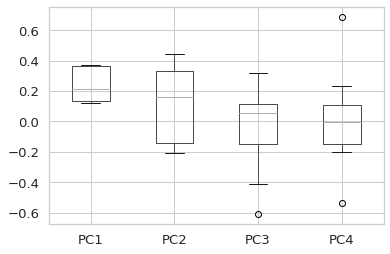

In [256]:
pcaComponents_dfl.iloc[:,:4].boxplot()

Observamos los diagramas de cajas y bigotes para los cuatro componentes principales que se decidió conservar, puesto que conservan más del 70% de la variabilidad (como se indica en la actividad). 

Solamente PC4 tiene dos valores extremos, uno positivo y uno negativo. Por otro lado, PC3 solo tiene un valor extremo en el eje negativo.
El valor máximo y mínimo de PC1 están muyr cercanos a la distribución de todos los datos que contiene.
PC2 es el que presenta una distribución más amplia entr todos los componentes. Es posible percibir que el largo de la caja es casi el doble que el resto.


### a) Varianza explicada
para cada componente

In [257]:
dfl_pcaResumen=pd.DataFrame({'Desviación estándar': np.sqrt(pca.explained_variance_),
                             'Proporción de la varianza': pca.explained_variance_ratio_,
                             'Varianza Acumulada': np.cumsum(pca.explained_variance_ratio_)
                             })

dfl_pcaResumen=dfl_pcaResumen.transpose()
dfl_pcaResumen.columns=['PC{}'.format(i) for i in range(1, len(dfl_pcaResumen.columns)+1)]
dfl_pcaResumen.round(4) 

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
Desviación estándar,2.5650,1.2986,1.0069,0.9398,0.9273,0.9019,0.8607,0.7963,0.6671,0.4653,0.2428,0.1730,0.1460,0.1348
Proporción de la varianza,0.4699,0.1205,0.0724,0.0631,0.0614,0.0581,0.0529,0.0453,0.0318,0.0155,0.0042,0.0021,0.0015,0.0013
Varianza Acumulada,0.4699,0.5904,0.6628,0.7259,0.7873,0.8454,0.8983,0.9436,0.9754,0.9908,0.9950,0.9972,0.9987,1.0000


In [258]:
dfl_pcaResumen=pd.DataFrame({'Varianza (%)': (pca.explained_variance_ratio_*100).round(2),
                             'Varianza Acumulada (%)': (np.cumsum(pca.explained_variance_ratio_)*100).round(2)
                             })

dfl_pcaResumen=dfl_pcaResumen.transpose()
dfl_pcaResumen.columns=['PC{}'.format(i) for i in range(1, len(dfl_pcaResumen.columns)+1)]
dfl_pcaResumen.round(4).transpose()

,Varianza (%),Varianza Acumulada (%)
PC1,46.99,46.99
PC2,12.05,59.04
PC3,7.24,66.28
PC4,6.31,72.59
PC5,6.14,78.73
PC6,5.81,84.54
PC7,5.29,89.83
PC8,4.53,94.36
PC9,3.18,97.54
PC10,1.55,99.08


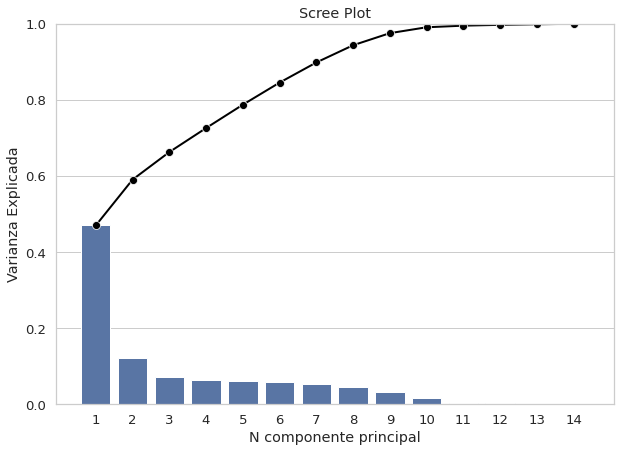

In [259]:
PC_components=np.arange(pca.n_components_) + 1
#PC_components
_ =sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax=plt.subplots(figsize=(10, 7))

_ =sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ =sns.lineplot(x = PC_components-1, 
                 y=np.cumsum(pca.explained_variance_ratio_), 
                 color='black', 
                 linestyle='-', 
                 linewidth=2, 
                 marker='o', 
                 markersize=8
                 )

plt.title('Scree Plot')
plt.xlabel('N componente principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

Observamos una gráfica de barras que contiene la varianza explicada para cada componente. Esto nos puede ayduar a determianr la cantidad de componentes a conservar para mantener cierto porcentaje de variabilidad en menos dimensiones

In [260]:
print('Varianza para los 4 componentes:',pca.explained_variance_ratio_[0:4],'\njuntos explicarían el:',
      sum(pca.explained_variance_ratio_[0:4]).round(3)*100, '% de la varianza','(',sum(pca.explained_variance_ratio_[0:4]).round(3),')')
print("")
print('Los valores propios reales de la covarianza son:\n',pca.explained_variance_)

Varianza para los 4 componentes: [0.46991461 0.12045676 0.07241853 0.06308625] 
juntos explicarían el: 72.6 % de la varianza ( 0.726 )

Los valores propios reales de la covarianza son:
 [6.57902384 1.68645093 1.01389316 0.88323696 0.859841   0.81334106
 0.74072842 0.63403499 0.44503576 0.21651988 0.05895206 0.02993052
 0.02132023 0.01815798]


### b) Importancia de las variables
para cada componente

In [261]:
pcaComponents_dfl=pd.DataFrame(pca.components_.transpose(), 
                                columns=dfl_pcaResumen.columns,
                                index=dfl.columns)
pcaComponents_dfl

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14
X1,0.251490,0.210373,-0.411439,-0.188711,-0.034804,0.009445,0.032171,0.017602,-0.825935,-0.049236,-0.004862,0.017131,0.002195,0.006472
X5,0.175619,0.111966,-0.611701,-0.539670,-0.152536,0.010803,-0.014629,0.015585,0.516943,-0.010874,-0.001397,-0.002392,-0.001156,0.001212
X12,0.356900,-0.207861,0.003622,0.040492,0.049484,0.031391,0.012146,0.002438,-0.003463,0.555235,0.389871,-0.436661,0.176527,-0.376886
X13,0.364368,-0.190732,0.054789,0.006936,0.043736,-0.017492,-0.051102,-0.124983,0.013077,0.402196,0.101271,0.289187,-0.241841,0.702176
X14,0.368685,-0.165816,0.090996,-0.018821,0.081498,-0.066307,-0.099628,0.072060,0.024331,0.135983,-0.460610,0.552467,-0.074812,-0.509630
X15,0.370318,-0.145689,0.118009,-0.015846,0.023750,-0.052737,0.099687,0.025898,0.032197,-0.178748,-0.562786,-0.410881,0.465004,0.280610
X16,0.367868,-0.136389,0.111749,0.021602,-0.030425,0.107501,0.024458,0.030841,0.036143,-0.423460,0.037807,-0.337971,-0.716621,-0.096228
X17,0.360976,-0.134713,0.051586,0.131182,-0.119958,0.001206,0.012651,0.033250,0.061648,-0.509754,0.523937,0.342105,0.401025,-0.002394
X18,0.148349,0.405391,0.298678,-0.203188,-0.006990,-0.259892,-0.379116,-0.674798,0.015086,-0.050548,0.040976,-0.067066,0.033921,-0.079835
X19,0.133408,0.444201,0.316738,-0.195640,0.094543,-0.265476,-0.203746,0.706711,0.036531,0.058782,0.110321,-0.035647,-0.014807,0.086430


Se imprime el valor de los vectores propios de las características de cada componente

In [262]:
print('Valor de los vectores propios de las características de cada componente')
print(90*'-')
for i in np.arange(0, pca.components_.shape[0]):
  print('\nComponente',i,':',abs(pca.components_[i]))

Valor de los vectores propios de las características de cada componente
------------------------------------------------------------------------------------------

Componente 0 : [0.25149041 0.17561928 0.35690001 0.3643676  0.36868536 0.37031848
 0.36786818 0.36097551 0.14834869 0.13340768 0.13765739 0.13183927
 0.12700774 0.12168409]

Componente 1 : [0.21037321 0.11196606 0.2078606  0.1907324  0.16581597 0.14568855
 0.13638886 0.13471264 0.40539112 0.44420132 0.3953214  0.34737626
 0.24278484 0.28390456]

Componente 2 : [0.41143855 0.61170097 0.00362215 0.05478914 0.09099613 0.11800935
 0.11174947 0.05158559 0.29867752 0.31673833 0.23233508 0.03341482
 0.36386552 0.19784859]

Componente 3 : [0.18871128 0.53966995 0.04049194 0.00693572 0.018821   0.01584589
 0.02160164 0.13118243 0.2031878  0.19563982 0.03276528 0.23489078
 0.68931745 0.20545048]

Componente 4 : [0.03480437 0.15253561 0.0494837  0.04373646 0.08149769 0.02375006
 0.03042539 0.11995826 0.00698984 0.09454275 0.23117168 0.

Se imprimen los valores de las primeras tres variables más importantes para cada componente

In [263]:
print('Mostramos el valor de las tres características más importantes para cada componente')
for i in np.arange(0, pca.components_.shape[0]):
  print('\nImportancia del componente',i,':',abs(np.sort(pca.components_[i])[::-1][0:3]))
#A mayor magnitud, mayor importancia

Mostramos el valor de las tres características más importantes para cada componente

Importancia del componente 0 : [0.37031848 0.36868536 0.36786818]

Importancia del componente 1 : [0.44420132 0.40539112 0.3953214 ]

Importancia del componente 2 : [0.31673833 0.29867752 0.23233508]

Importancia del componente 3 : [0.68931745 0.23489078 0.20545048]

Importancia del componente 4 : [0.86604625 0.09454275 0.08149769]

Importancia del componente 5 : [0.78024091 0.14836842 0.10750055]

Importancia del componente 6 : [0.81806596 0.13194215 0.09968712]

Importancia del componente 7 : [0.7067109  0.0720598  0.04848031]

Importancia del componente 8 : [0.51694323 0.13473069 0.123696  ]

Importancia del componente 9 : [0.55523547 0.40219629 0.13598324]

Importancia del componente 10 : [0.52393717 0.38987131 0.11032108]

Importancia del componente 11 : [0.55246725 0.34210518 0.28918677]

Importancia del componente 12 : [0.46500356 0.40102493 0.17652697]

Importancia del componente 13 : [0.702176

Se imprimen las primeras tres variables más importantes para cada componente

In [264]:
#pcaComponents_dfl.PC1.abs().nlargest(3)
for i in range(0, pcaComponents_dfl.shape[0]): #pcaComponents_dfl.shape, primera dimensión
  print(pcaComponents_dfl.iloc[:,i].abs().nlargest(3))

X15    0.370318
X14    0.368685
X16    0.367868
Name: PC1, dtype: float64
X19    0.444201
X18    0.405391
X20    0.395321
Name: PC2, dtype: float64
X5     0.611701
X1     0.411439
X22    0.363866
Name: PC3, dtype: float64
X22    0.689317
X5     0.539670
X21    0.234891
Name: PC4, dtype: float64
X23    0.866046
X22    0.261286
X21    0.260585
Name: PC5, dtype: float64
X21    0.780241
X22    0.457218
X19    0.265476
Name: PC6, dtype: float64
X20    0.818066
X18    0.379116
X21    0.314116
Name: PC7, dtype: float64
X19    0.706711
X18    0.674798
X13    0.124983
Name: PC8, dtype: float64
X1     0.825935
X5     0.516943
X23    0.134731
Name: PC9, dtype: float64
X12    0.555235
X17    0.509754
X16    0.423460
Name: PC10, dtype: float64
X15    0.562786
X17    0.523937
X14    0.460610
Name: PC11, dtype: float64
X14    0.552467
X12    0.436661
X15    0.410881
Name: PC12, dtype: float64
X16    0.716621
X15    0.465004
X17    0.401025
Name: PC13, dtype: float64
X13    0.702176
X14    0.509630
X1

Se imprime el valor solo la variable de mayor importancia para cada componente

In [265]:
for i in np.arange(0, pca.components_.shape[0]):
  print('Importancia del componente',i,':',abs(pca.components_[i]).max())

Importancia del componente 0 : 0.3703184847006339
Importancia del componente 1 : 0.4442013235914141
Importancia del componente 2 : 0.6117009687560482
Importancia del componente 3 : 0.6893174504709204
Importancia del componente 4 : 0.8660462461892778
Importancia del componente 5 : 0.7802409097863693
Importancia del componente 6 : 0.8180659631444689
Importancia del componente 7 : 0.7067109022222602
Importancia del componente 8 : 0.8259350616747384
Importancia del componente 9 : 0.5552354664772814
Importancia del componente 10 : 0.5627857732760191
Importancia del componente 11 : 0.5524672492432076
Importancia del componente 12 : 0.716621436121715
Importancia del componente 13 : 0.7021761750428718


Se imprime solo la variable de mayor importancia para cada componente

In [266]:
pca_df_components=pd.DataFrame(pcaComponents_dfl)
print('Las variable de mayor importancia para cada componente es:')
print(pca_df_components.abs().idxmax())

Las variable de mayor importancia para cada componente es:
PC1     X15
PC2     X19
PC3      X5
PC4     X22
PC5     X23
PC6     X21
PC7     X20
PC8     X19
PC9      X1
PC10    X12
PC11    X15
PC12    X14
PC13    X16
PC14    X13
dtype: object


Se imprime la más importante variable y su valor para cada componente

In [267]:
for i in range(0, pcaComponents_dfl.shape[0]): #pcaComponents_dfl.shape, primera dimensión
  print(pcaComponents_dfl.iloc[:,i].abs().nlargest(1))

X15    0.370318
Name: PC1, dtype: float64
X19    0.444201
Name: PC2, dtype: float64
X5    0.611701
Name: PC3, dtype: float64
X22    0.689317
Name: PC4, dtype: float64
X23    0.866046
Name: PC5, dtype: float64
X21    0.780241
Name: PC6, dtype: float64
X20    0.818066
Name: PC7, dtype: float64
X19    0.706711
Name: PC8, dtype: float64
X1    0.825935
Name: PC9, dtype: float64
X12    0.555235
Name: PC10, dtype: float64
X15    0.562786
Name: PC11, dtype: float64
X14    0.552467
Name: PC12, dtype: float64
X16    0.716621
Name: PC13, dtype: float64
X13    0.702176
Name: PC14, dtype: float64


## 8 Histogramas de los atributos
para visualizar su distribución

Varianza explicada respecto a los componentes obtenidos con PCA

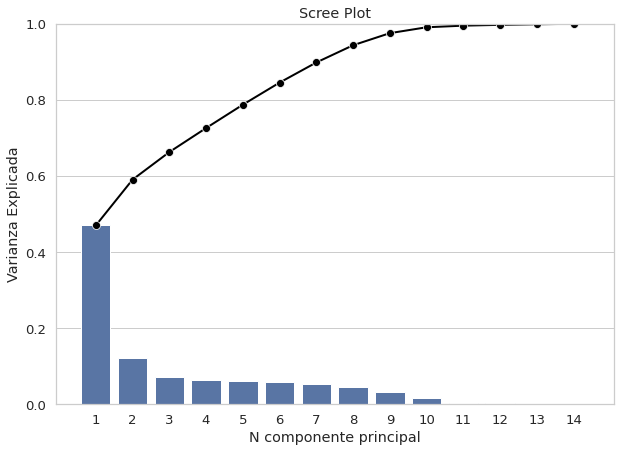

In [268]:
PC_components=np.arange(pca.n_components_) + 1
#PC_components
_ =sns.set(style = 'whitegrid', 
            font_scale = 1.2
            )

fig, ax=plt.subplots(figsize=(10, 7))

_ =sns.barplot(x = PC_components, 
                y = pca.explained_variance_ratio_, 
                color = 'b'
                )

_ =sns.lineplot(x = PC_components-1, 
                 y=np.cumsum(pca.explained_variance_ratio_), 
                 color='black', 
                 linestyle='-', 
                 linewidth=2, 
                 marker='o', 
                 markersize=8
                 )

plt.title('Scree Plot')
plt.xlabel('N componente principal')
plt.ylabel('Varianza Explicada')
plt.ylim(0, 1)
plt.show()

Varianza explicada para determinar la cantidad de componentes que necesitamos. En este caso cuatro para mantener la variabilidad mayor al 70%

Se crea una lista con el valor de la variable más importante para cada componente

In [269]:
lista=list()
for i in np.arange(0, pca.components_.shape[0]):
  lista.append(abs(pca.components_[i]).max())

lista

[0.3703184847006339,
 0.4442013235914141,
 0.6117009687560482,
 0.6893174504709204,
 0.8660462461892778,
 0.7802409097863693,
 0.8180659631444689,
 0.7067109022222602,
 0.8259350616747384,
 0.5552354664772814,
 0.5627857732760191,
 0.5524672492432076,
 0.716621436121715,
 0.7021761750428718]

Se grafica el valor máximo respecto a la importancia de cada variable para todos los componentes obtenidos de PCA

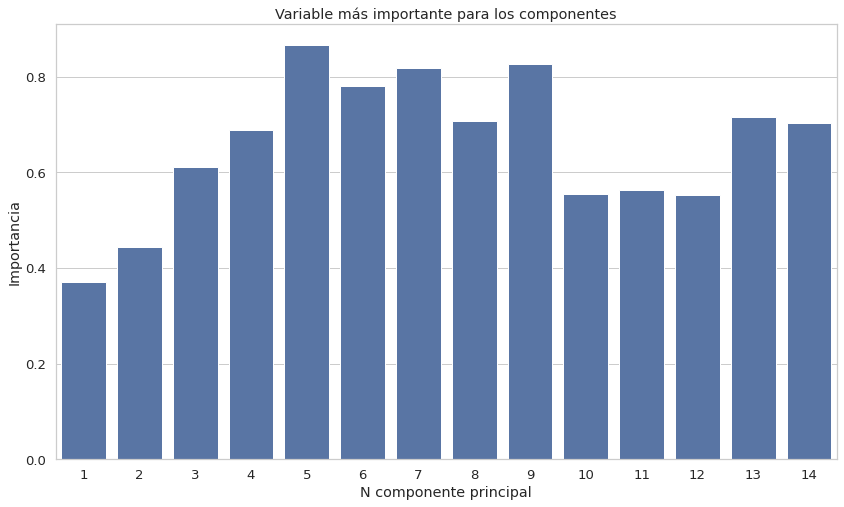

In [270]:
fig, ax = plt.subplots(figsize = (14, 8))
for i in np.arange(0, pca.components_.shape[0]):
  sns.barplot(x = PC_components, 
                y = lista, 
                color = 'b')

plt.title('Variable más importante para los componentes')
plt.xlabel('N componente principal')
plt.ylabel('Importancia')
plt.show()

Observamos que es el quinto componente el que tiene una variable cuyo valor de importancia es mayor, comparada con el resto de los valores para todos los componentes

Se crean los histogramas para cada variable del dataframe, donde ya se han limpiado los datos

Se observa su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c63c39890>,
      dtype=object)

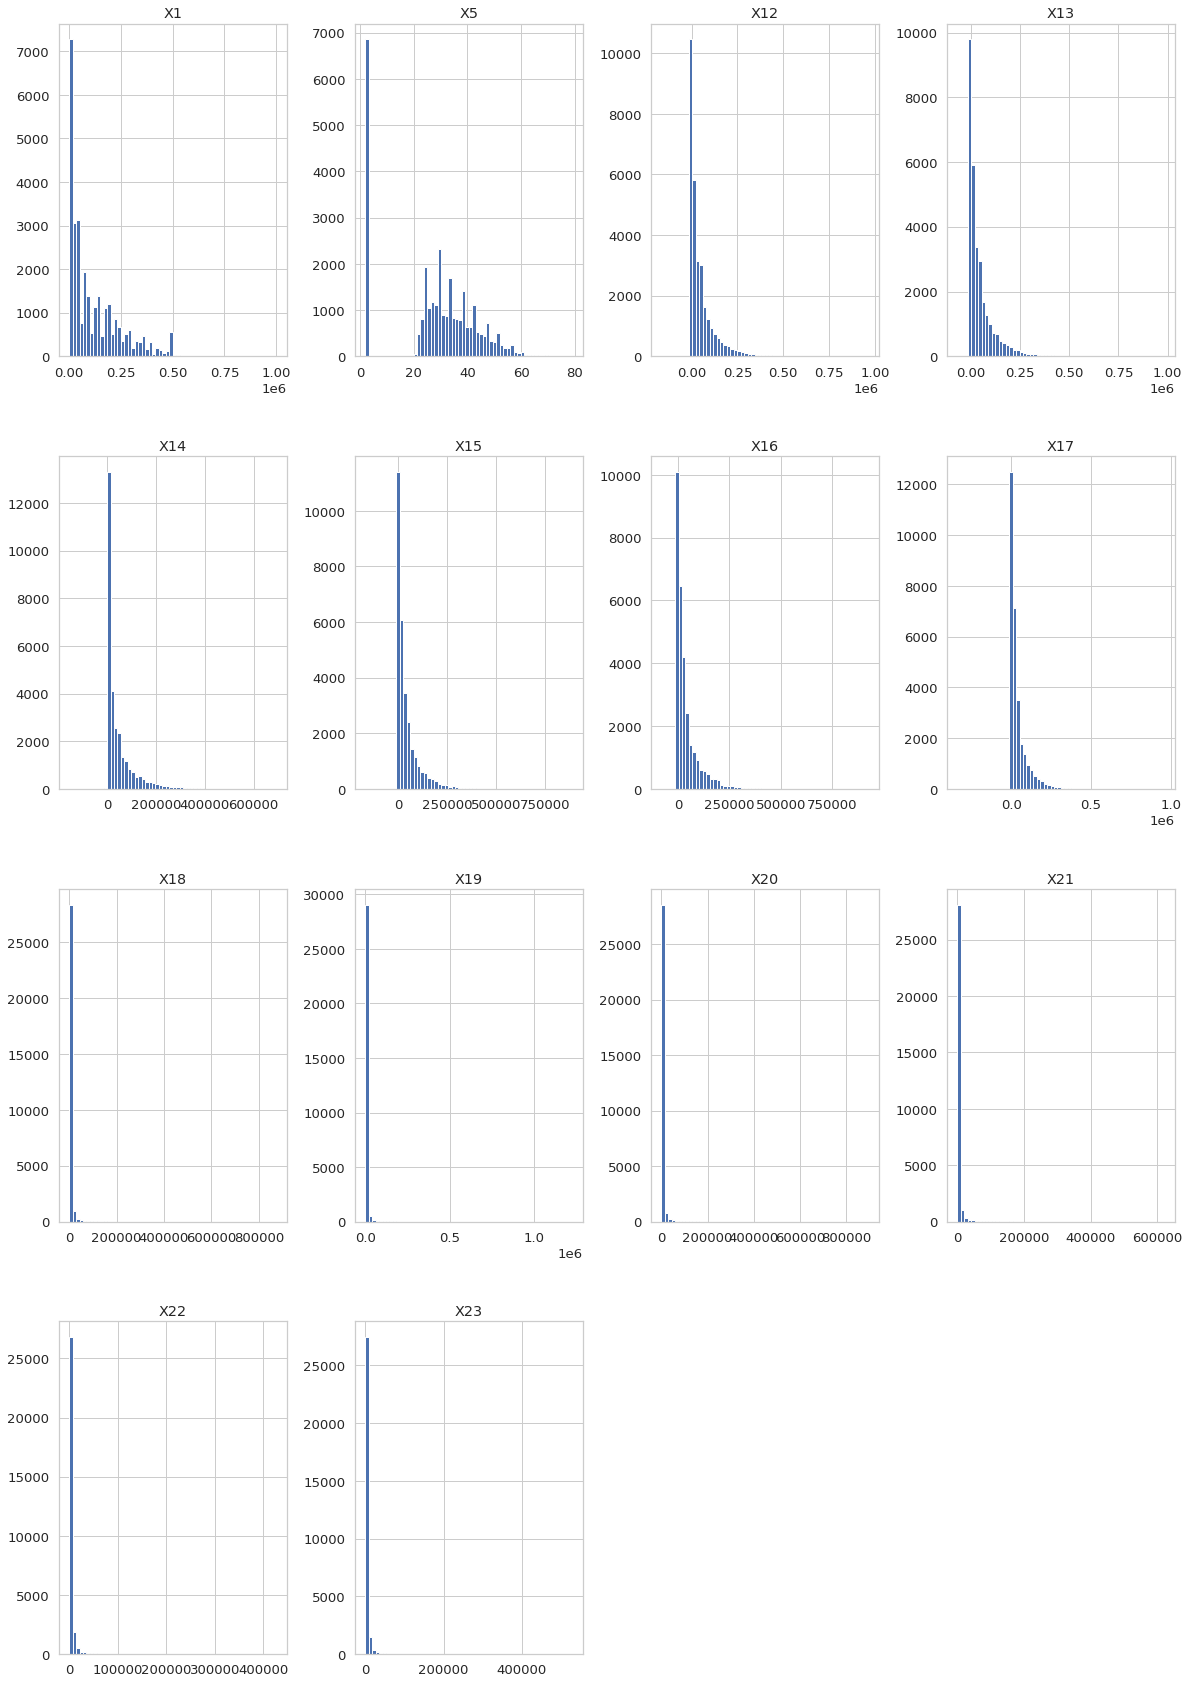

In [271]:
dfl.hist(bins=60, figsize=(20,30))

Observamos una distribución más amplia para X5, que e sla variable correspondiente a la edad. De igual forma, observamos que todas las variables tienen sesgo positivo

Se crean los histogramas correspondientes a las variables que generan los componentes, obtenidos a través de PCA

Se observa su distribución

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c63bc4a50>,
      dtype=object)

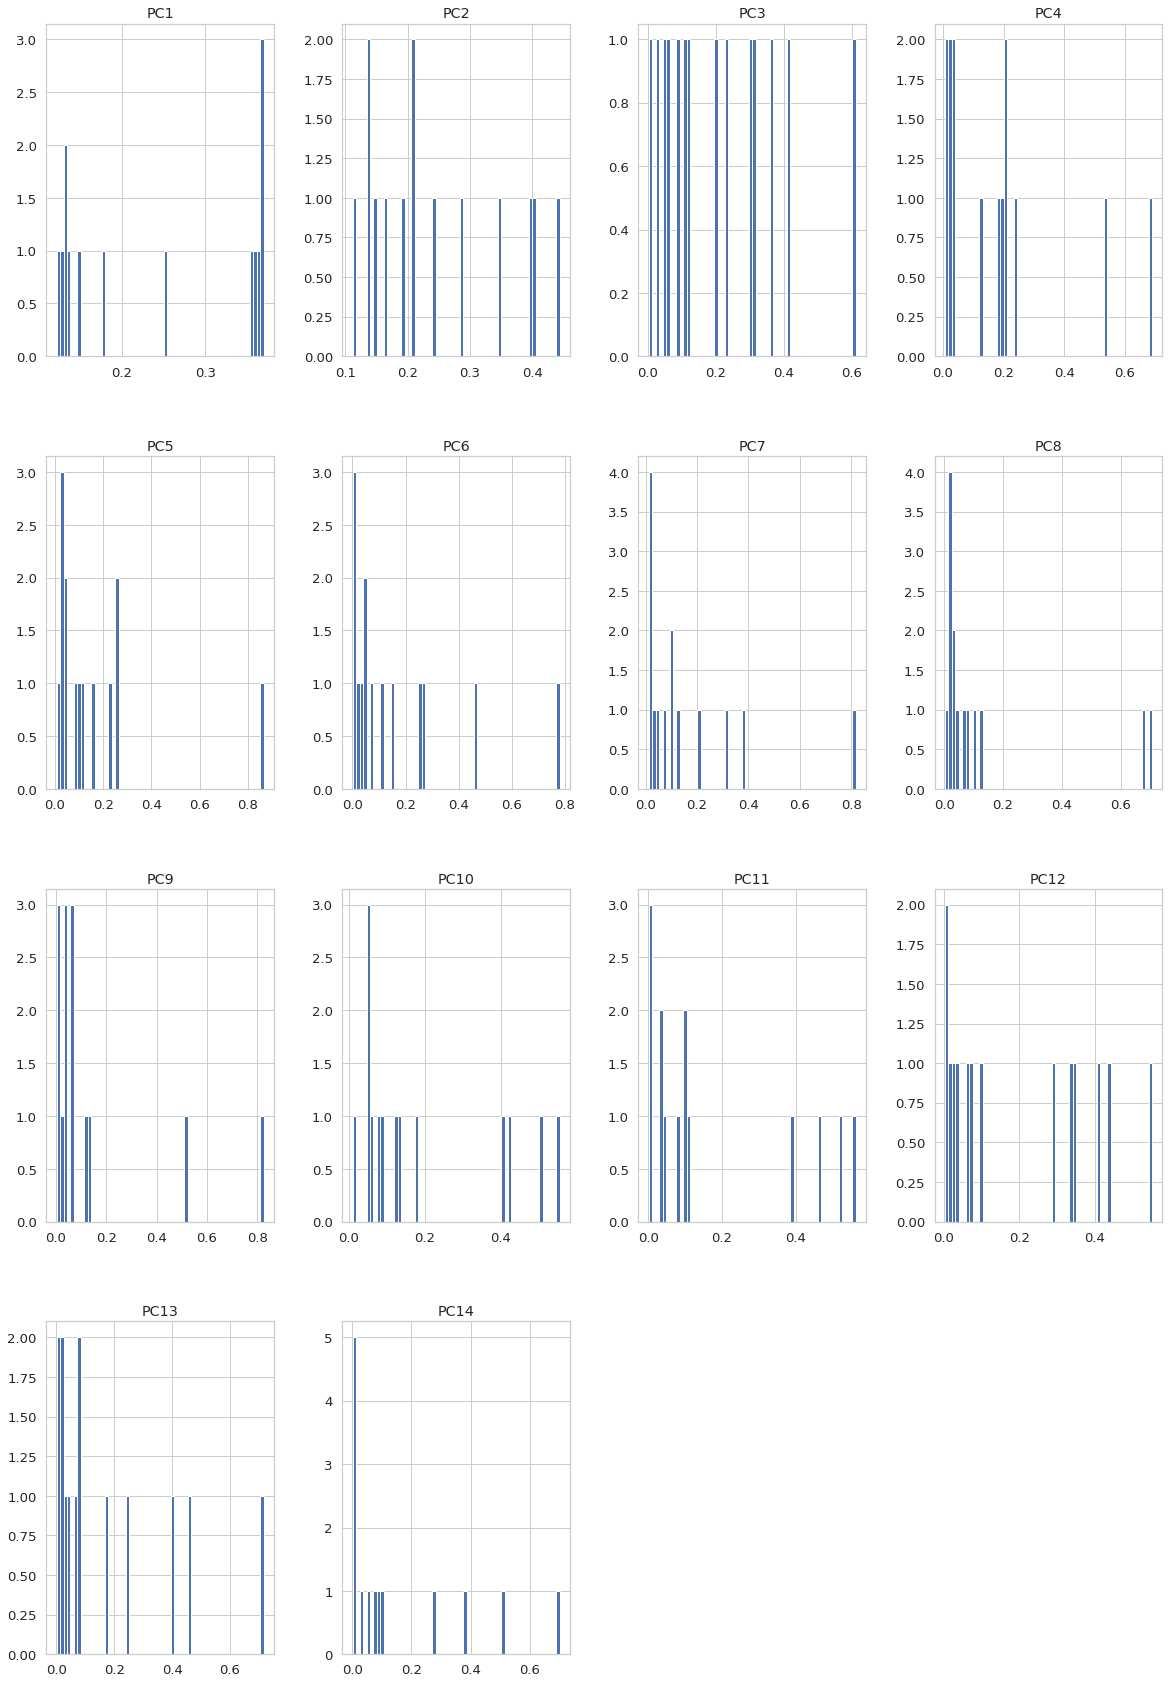

In [272]:
pca_df_components.abs().hist(bins=60, figsize=(20,30))

No se observan patrones muy claros conforme a la importancia de la variables en cada componente generado

## 9 Visualización de los datos

### Mapa de calor (heatmap)
para las correlaciones entre las variables del dataframe original

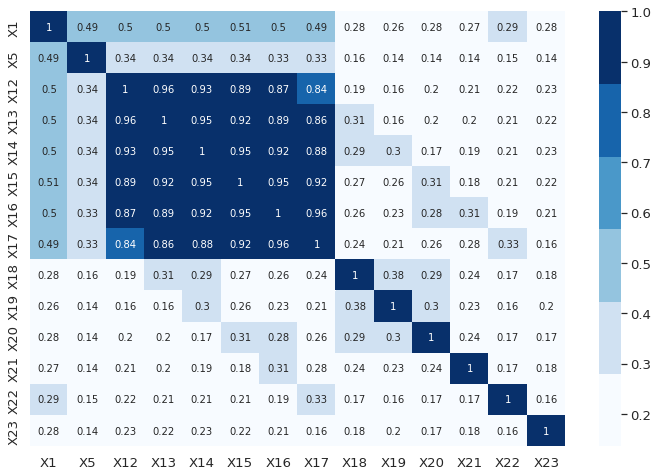

In [273]:
plt.figure(figsize = (12,8))
sns.heatmap(correlacion, annot=True, cmap=plt.cm.get_cmap('Blues', 6), annot_kws={'size':10})

Para los componentes generados con PCA

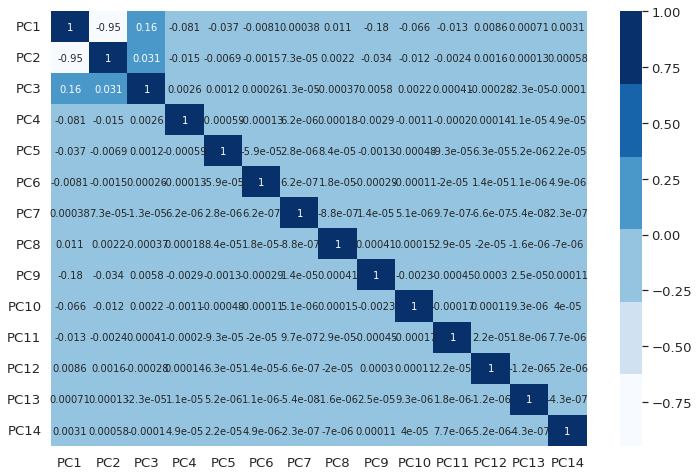

In [274]:
correlacionComponentes=pcaComponents_dfl.corr()

plt.figure(figsize = (12,8))
sns.heatmap(correlacionComponentes, cmap=plt.cm.get_cmap('Blues', 6), annot=True, annot_kws={'size':10})

### Diagrama de cajas y bigotes (boxplot)
para todos los componentes

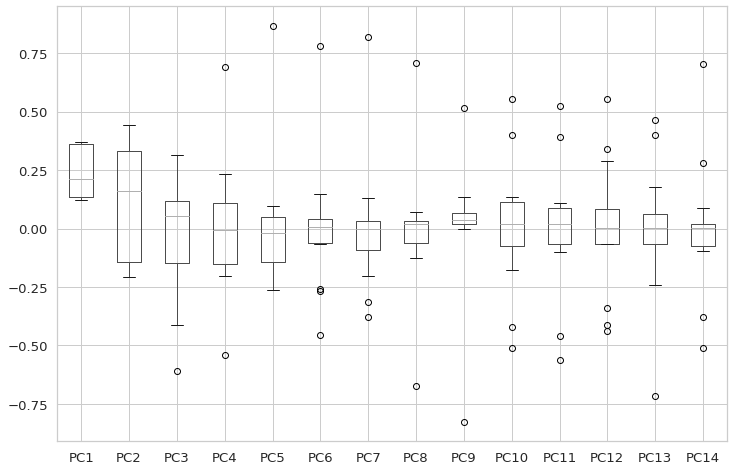

In [275]:
plt.figure(figsize = (12,8))
pcaComponents_dfl.boxplot()

### Gráfica de pastel
para la varianza de los componentes principales y la restante agrupada

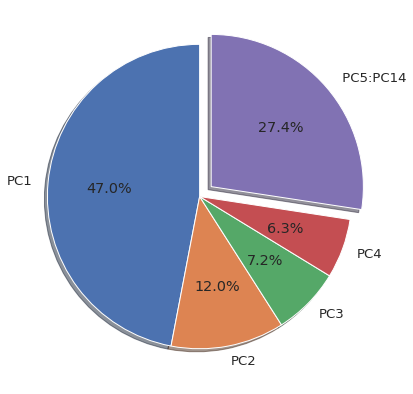

In [276]:
componentes4=['PC1','PC2','PC3','PC4',' PC5:PC14']
data=np.append(pca.explained_variance_ratio_[0:4], np.array((1-sum(pca.explained_variance_ratio_[0:4]))))
fig = plt.figure(figsize =(10, 7))
myexplode = (0, 0, 0, 0, 0.1) 
plt.pie(data, labels=componentes4, explode=myexplode, autopct='%1.1f%%', shadow=True, startangle=90, )
plt.show()

## 10 Interpretación de los gráficos

#### Mapa de calor del DataFrame 
que contiene las misma variables con las que se trabaja PCA (eliminando, por ejemplo, la salida Y)

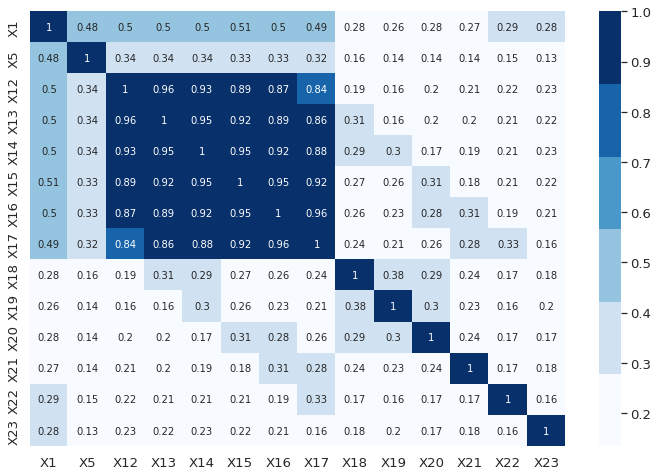

Lógicamente, sin contemplar la diagonal donde las variables consigo mismas tienen una correlación máxima, se pueden observar que, desde la variable X12 hasta la X17, se tiene una correlación fuerte, entre las mismas de ese grupo, casi obteniendo el puntaje máximo para algunos casos. De igual forma, es posible apreciar que X1 tiene una correlación medianamente fuerte con el mismo grupo de variables, anexando a ellas X5.
Recordemos que una correlación entre variables (ya sea positiva o negativa) nos indica que mientras una cambia, la otra lo hace también de forma proporcional, sin embargo, dicha correlación no implica causalidad.


#### Mapa de calor de los componentes

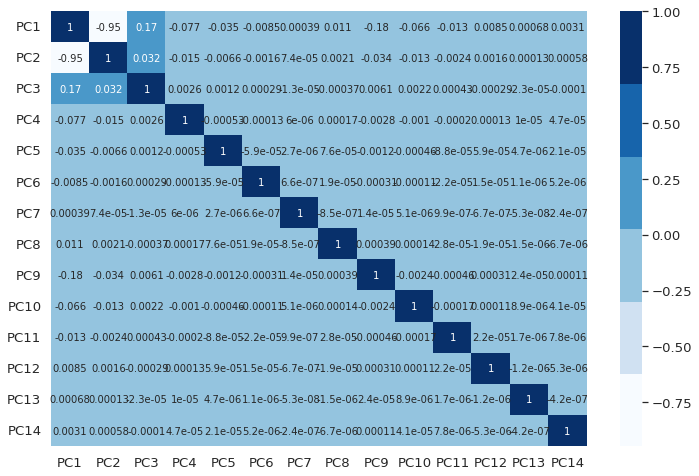

Recordando la teoría, PCA genera compontes a partir de las variables originales, las cuales ya no están correlacionadas. Por tanto, como se puede observar en este mapa de calor para la correlación entre componentes, tal afirmación resulta verídica, pues en general se tienen valores de correlación muy pequeños y sin muchas irregularidades o patrones (obviamente, salvo la diagonal de los componentes consigo mismos).

#### Boxplot de los componentes

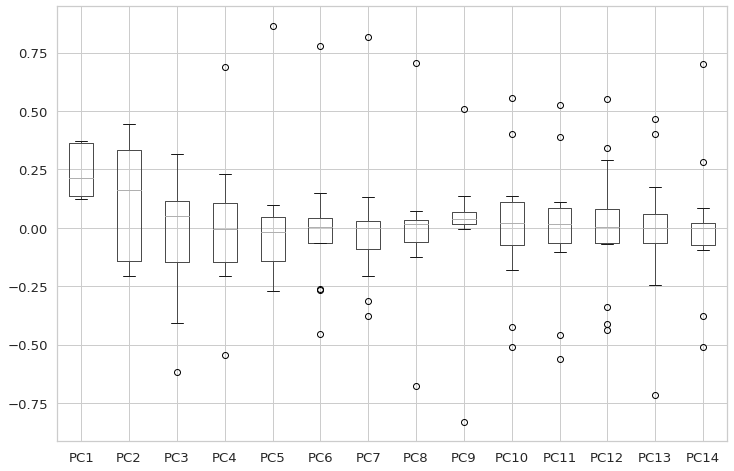

En este gráfico de cajas y bigotes, observamos que la mayoría de los componentes poseen una mediana alrededor o cercana a cero, lo que nos hace sentido, pues escalamos los datos originales para que fuese de tal manera. De igual forma, observamos que no existen tantos valores atípicos (outliers), el caso máximo se observa en PC12, donde se tiene hasta cinco indicadores de ellos.
Por otro lado, de manera generalizada resulta sencillo apreciar que la distribución de muchos de los componentes es asimétrica positiva con cola hacia la derecha, tal como es el ejemplo de PC9, PC12, PC6. Asimismo, observamos que otros componentes tienen una distribución asimétrica negativa con cola hacia la izquierda, justo como PC3. De igual forma es posible apreciar otros dos casos muy particulares, donde en PC1 el valor máximo y mínimo están muy cercanos a toda la distribución de los datos, lo que visualmente se traducen en colas o bigotes muy cercanos a la caja; el otro caso es en PC9 donde la distribución de los datos no es muy amplia, es decir, es lo contrario a PC2, el cual, por cierto, no tiene ningún valor extremo, al igual que PC1.


#### Gráfica de pastel sobre la variabilidad
a través de los componentes

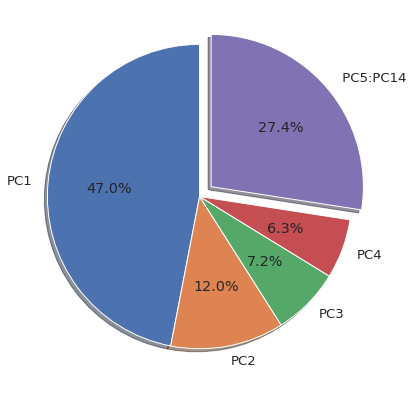

En esta gráfica de pie o pastel se observa el porcentaje de variabilidad para los primeros cuatro componentes de forma individual, que son justamente los que decidimos conservar para mantener más del 70% de variabilidad. El resto, es decir, del componente 5 al 14 (los que dejamos fuera) suman el 27.4% de la variabilidad total, pero contemplando que ese rango abarca 9 componentes, se entiende que su porcentaje de variabilidad individual es relativamente insignificante.
Por otro lado, justo como nos indica la teoría, la técnica de PCA es capaz de identificar el eje con el mayor valor de variación. Dicho en otras palabras, el porcentaje de variabilidad será mayor en el primer componente y menor en los restantes, que es justamente lo que podemos ver en la gráfica, donde el primer componente posee un 47% de ella, casi la mitad y el segundo (PC2) con un porcentaje del 12%, que es mucho menor en comparación al primero. Tal porcentaje de variabilidad continúa disminuyendo conforme vamos avanzando entre los componentes.


# Conclusión

Durante el desarrollo de la actividad, fueron necesarios varios pasos, no solo aplicar PCA, sino también fue posible analizar de forma menos superficial el conjunto de datos en ámbitos técnicos como también teóricos, es decir, conociéndolo a través de códigos, comandos, métodos y funciones, pero también leyendo por quién fue realizado, cómo surge y con base en qué (los datos). 
Así pues, una vez que se tiene la base de datos cargada, debemos preprocesarla, puesto que la calidad de los datos también influye en la calidad del resultado. En dicha limpieza se consideró la imputación para datos faltantes, donde en los categóricos se contempla el valor más frecuente como método, para las variables numéricas se empleó la imputación media y para la salida se optó por eliminar dichas columnas con elementos faltantes. Aquí es importante destacar que el preprocesamiento en este caso no solo el tratamiento de datos faltantes, sino también asegurarnos que los datos tenían sentido, es decir, verificar si las variables categóricas contenían valores únicamente dentro de las opciones disponibles y si no era así (lo cual sí sucedió), corregir de alguna forma dicha cuestión; para estos casos, opté por asignar los inválidos a las categorías ‘otra’ cuando era posible, pues si no nos comentaba que perteneciera  a alguna de las específicas, era simplemente otra. Retomando lo anterior otro ejemplo fueron las cifras de pago negativas, ya que es ilógico pagar de forma negativa, se hizo la corrección a positiva, contemplando que se tratase de un error de captura donde, en este caso, solamente -1 es una opción válida, correspondiente al pago debido.
Todos los pasos anteriores, respecto al preprocesamiento resultan más sencillos cuando se conocen los datos con que se está trabajando, como fue en esta actividad imprimiendo algunas filas, verificando el tipo de datos, imprimiendo su información, sus dimensiones, el nombre de las columnas o sus estadísticos descriptivos.
Posteriormente, fue posible aplicar PCA, donde se contempló una variabilidad mayor al 70% (como se sugiere en la actividad), lo cual se satisfacía con únicamente 4 componentes. Para dicho análisis no se consideraron algunas variables, como fue precisamente el ID, puesto que no es información como tal (todas las cuales se documentan en el código). Para seleccionar los componentes se utiliza la varianza explicada para cada componente y también para los que se seleccionaron particularmente. De igual forma es explicada la importancia de las variables para cada componente, las primeras tres variables más relevantes y posteriormente solo una donde, recordemos, a mayor magnitud, mayor importancia, 
Por otro lado, se crearon histogramas de los atributos, de forma que fue posible observar la distribución tanto las variables del datraframe, en específico las que se limpiaron para aplicarles PCA, es decir, sin las variables categóricas, filas imputadas o eliminadas y después de haber asegurado que solo contengan valores lógicos, como también para demostrar el valor de la variable de mayor importancia para cada componente generado. De igual forma, se mostró la varianza acumulada para los mismos y todos los valores (su importancia), de forma que podía entenderse de manera más clara la distribución de los datos donde, por ejemplo, todas las variables de dataframe tienen sesgo positivo y la variable con una distribución más amplia es la que corresponde a la edad (X5).
Finalmente se realizaron y obtuvieron gráficos pertinentes a los datos en general (en el desarrollo de la actividad también se trabajan algunos otros), para explicar y entender mejor, desde la correlación entre las variables originales (que en algunas fue bastante alta), los componentes (que, dada la teoría, no debían estar muy correlacionados) para poder compararlas. También se realizó un diagrama de caja y bigotes para observar la distribución de los datos, sus valores extremos, el tipo de distribución, valores máximos y mínimos. El último grafico realizado fue el diagrama de pastel con la varianza de los componentes seleccionados y la agrupación como quinta división al resto de ellos; su acumulado, se generó con la finalidad de respaldar o comprobar la teoría que nos indica que habrá un mayor porcentaje de variabilidad en el primer componente y menos en los restantes, que es justamente lo que se pudo observar, pues casi la mitad de ella para el primero y disminuía conforme avanzábamos entre los componentes. 
En general esta actividad requirió un desarrollo considerable, pero fue muy provechosa al trabajarla implementando los diversos recursos que han revisado conforme las semanas previas, tanto en la misma técnica de PCA, correlaciones, la importancia de las características o la visualización. Personalmente me parece un gran ejercicio involucrarlo todo en un procedimiento para ir aclarando puntos no definidos del todo y en sí digerir mejor la información a través de la práctica.







# Referencias

- Yeh, I. C., & Lien, C. H. (2009). The comparisons of data mining techniques for the predictive accuracy of probability of default of credit card clients. Expert Systems with Applications, Recuperado de: https://www.sciencedirect.com/science/article/abs/pii/S0957417407006719#!
- Shanthababu, P. (2021). Effective Data Visualization Techniques in Data Science Using Python. Analytics Vidhya. Recuperado de: https://www.analyticsvidhya.com/blog/2021/08/effective-data-visualization-techniques-in-data-science-using-python/
- Rajbangshi, A. (2020). Importance of Data Storytelling in Data Science. Artificial Intelligence in Plain English. Recuperado de: https://ai.plainenglish.io/importance-of-data-storytelling-in-data-science-494f49273027
- Das, A. (2020). Data Visualization in Data Science. Towards Data Science. Recuperado de: https://towardsdatascience.com/data-visualization-in-data-science-5681cbdde5bf
- Fundamentals of data visualization: a primer on making informative and compelling figures. O'Reilly Media
- VanderPlas, J.  Python data science handbook: Essential tools for working with data. " O'Reilly Media, Inc."